# Snowflake - One Data Platform for the Enterprise


Any Enterprise in the current world has tons and tons of data and who uses their data to perform analytics and act on the insights has edge over their competitors. To manage their data through out its life cycle they had to employ lot of tools and technologies. There is no single platform to provide help them manage their data secured and derive insights until recent years. Snowflake can be one type of platform in the recent years that can handle all stages of data management. With its unique data sharing features across cloud and across regions, performance at scale and unique architecture Snowflake is growing enormosly in the recent years. As an enterprise another biggest concern would be Vendor lock in, Snowflake supporting all 3 clouds seamlessly making Hybrid cloud architectures possible is another critical factor why Customers love and chose Snowflake. 

The below image shows common Data Mangement Life Cycle in an enterprise and few of the features to cover the same.

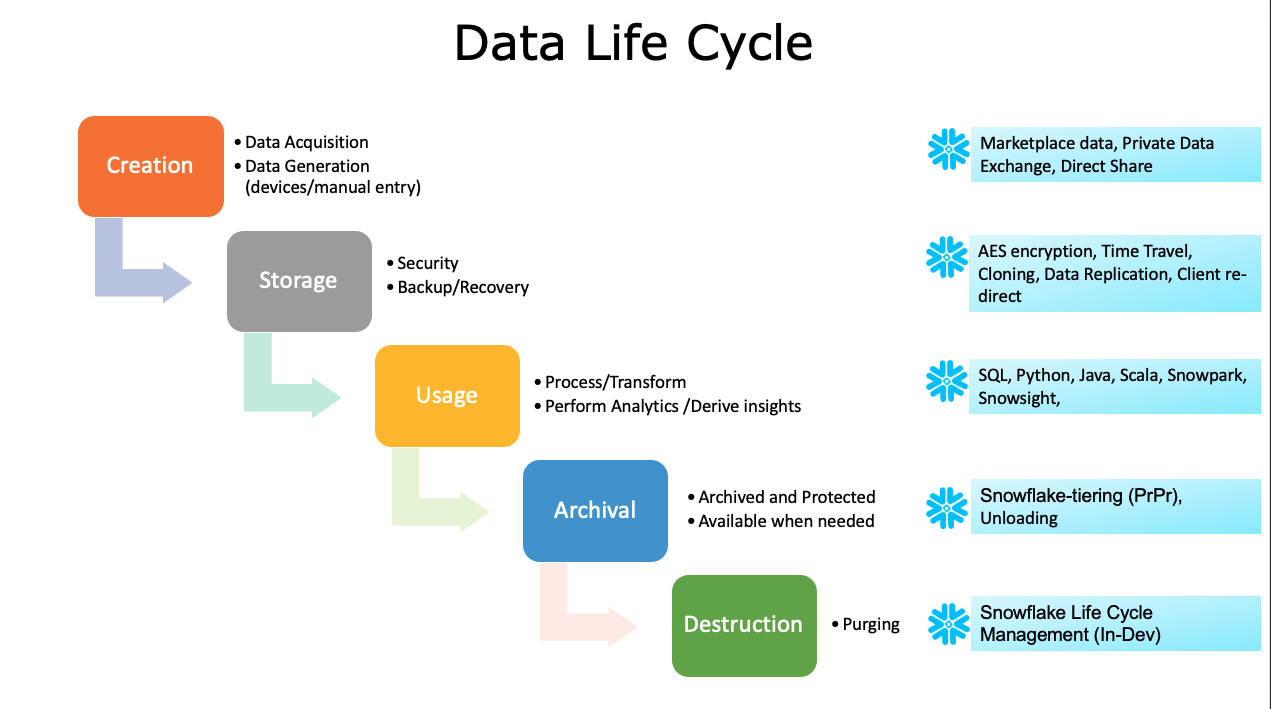

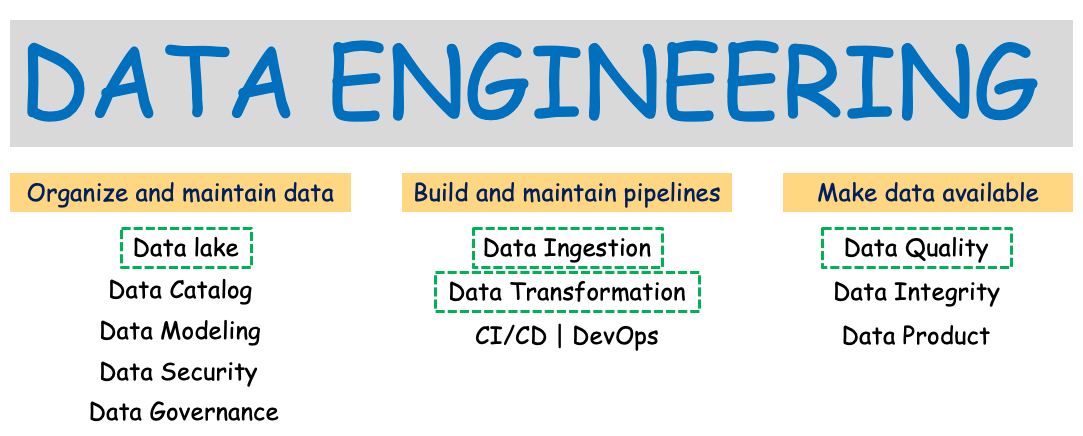

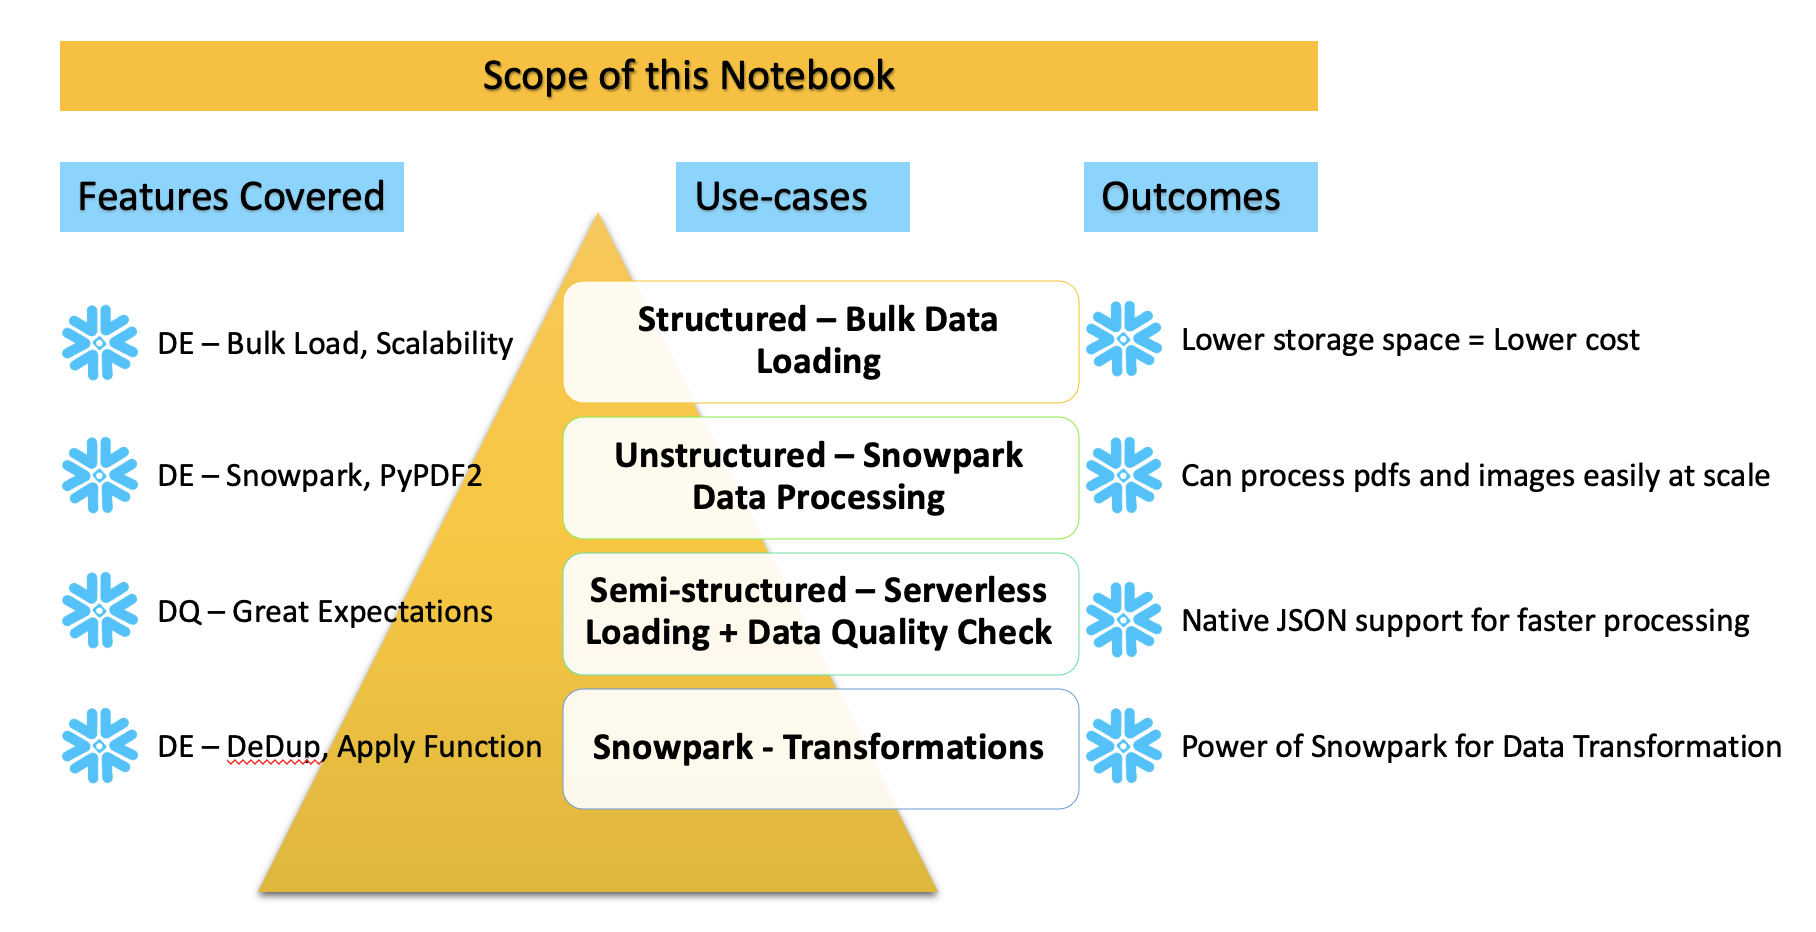

### Establising session with Snowflake

In [1]:
# Snowpark
import snowflake.snowpark
from snowflake.snowpark.functions import sproc
from snowflake.snowpark.session import Session
from snowflake.snowpark import version as v
import json
from config import snowflake_conn_prop_local as snowflake_udf_conn_prop

import pandas as pd
import numpy as np
import datetime
import io

session = Session.builder.configs(snowflake_udf_conn_prop).create()
print(session.sql('select current_account(), current_warehouse(), current_database(), current_schema()').collect())

session.add_packages('snowflake-snowpark-python', 'pandas', 'numpy')

[Row(CURRENT_ACCOUNT()='ANA95816', CURRENT_WAREHOUSE()='DEMO_QAS_WH', CURRENT_DATABASE()='BRONZE_LAYER', CURRENT_SCHEMA()='PUBLIC')]


The version of package numpy in the local environment is 1.24.2, which does not fit the criteria for the requirement numpy. Your UDF might not work when the package version is different between the server and your local environment


# <font size="5"><ins>Structured Data Loading</ins></font>

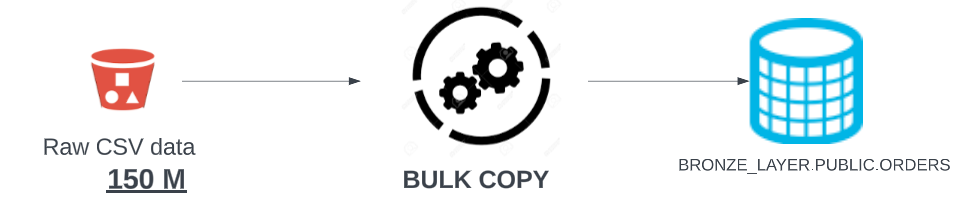

In this exercise, we will load raw csv files from S3 in bulk into Snowflake. Compare the size of data in the cloud Vs Snowflake - Saving storage cost

In [10]:
### SETUP ####
# session.sql("CREATE OR REPLACE DATABASE BRONZE_LAYER;").collect()
session.sql(" \
CREATE OR REPLACE STORAGE INTEGRATION BRONZE_INTEGRATION  \
  TYPE = EXTERNAL_STAGE  \
  STORAGE_PROVIDER = S3  \
  ENABLED = TRUE  \
  STORAGE_AWS_ROLE_ARN = 'arn:aws:iam::484577546576:role/naveen-ey-be-dp-demo'  \
  STORAGE_ALLOWED_LOCATIONS = ('s3://naveen-demo-s3-bucket/');  \
").collect()


[Row(property='ENABLED', property_type='Boolean', property_value='true', property_default='false'),
 Row(property='STORAGE_PROVIDER', property_type='String', property_value='S3', property_default=''),
 Row(property='STORAGE_ALLOWED_LOCATIONS', property_type='List', property_value='s3://naveen-demo-s3-bucket/', property_default='[]'),
 Row(property='STORAGE_BLOCKED_LOCATIONS', property_type='List', property_value='', property_default='[]'),
 Row(property='STORAGE_AWS_IAM_USER_ARN', property_type='String', property_value='arn:aws:iam::040558436780:user/4lot-s-p2sw7267', property_default=''),
 Row(property='STORAGE_AWS_ROLE_ARN', property_type='String', property_value='arn:aws:iam::484577546576:role/naveen-ey-be-dp-demo', property_default=''),
 Row(property='STORAGE_AWS_EXTERNAL_ID', property_type='String', property_value='ANA95816_SFCRole=2_Lpi6BcU9+AqIuteFVOEDlcMmjMg=', property_default=''),
 Row(property='COMMENT', property_type='String', property_value='', property_default='')]

In [16]:
session.sql("DESC INTEGRATION BRONZE_INTEGRATION;").collect()

[Row(property='ENABLED', property_type='Boolean', property_value='true', property_default='false'),
 Row(property='STORAGE_PROVIDER', property_type='String', property_value='S3', property_default=''),
 Row(property='STORAGE_ALLOWED_LOCATIONS', property_type='List', property_value='s3://naveen-demo-s3-bucket/', property_default='[]'),
 Row(property='STORAGE_BLOCKED_LOCATIONS', property_type='List', property_value='', property_default='[]'),
 Row(property='STORAGE_AWS_IAM_USER_ARN', property_type='String', property_value='arn:aws:iam::040558436780:user/4lot-s-p2sw7267', property_default=''),
 Row(property='STORAGE_AWS_ROLE_ARN', property_type='String', property_value='arn:aws:iam::484577546576:role/naveen-ey-be-dp-demo', property_default=''),
 Row(property='STORAGE_AWS_EXTERNAL_ID', property_type='String', property_value='ANA95816_SFCRole=2_Lpi6BcU9+AqIuteFVOEDlcMmjMg=', property_default=''),
 Row(property='COMMENT', property_type='String', property_value='', property_default='')]

In [12]:
### SETUP ####
%time
session.sql("create or replace file format my_csv_format type = csv COMPRESSION = NONE; --compression = gzip;").collect()
session.sql("CREATE OR REPLACE STAGE my_s3_csv_stage  storage_integration = BRONZE_INTEGRATION url = 's3://naveen-demo-s3-bucket/sales/csv/' file_format = my_csv_format;").collect()
session.sql("CREATE OR REPLACE TABLE ORDERS LIKE SNOWFLAKE_SAMPLE_DATA.TPCH_SF100.ORDERS;").collect()
session.sql("CREATE OR REPLACE TABLE CUSTOMER as (SELECT * FROM SNOWFLAKE_SAMPLE_DATA.TPCH_SF100.CUSTOMER);").collect()
session.sql("CREATE OR REPLACE TABLE LINEITEM as (SELECT * FROM SNOWFLAKE_SAMPLE_DATA.TPCH_SF100.LINEITEM);").collect()


[Row(status='Table LINEITEM successfully created.')]

In [13]:
session.sql("ALTER WAREHOUSE DEMO_QAS_WH SET WAREHOUSE_SIZE = 'X-LARGE';").collect() #-- For re-runs
session.sql("TRUNCATE TABLE CUSTOMER;;").collect()
session.sql("TRUNCATE TABLE ORDERS;;").collect()
session.sql("TRUNCATE TABLE LINEITEM;").collect()

[Row(status='Statement executed successfully.')]

In [14]:
### SETUP ####
%time
session.sql("create or replace file format my_csv_format type = csv COMPRESSION = NONE; --compression = gzip;").collect()
session.sql("CREATE OR REPLACE STAGE my_s3_csv_stage  storage_integration = BRONZE_INTEGRATION url = 's3://naveen-demo-s3-bucket/sales/csv/' file_format = my_csv_format;").collect()
session.sql("CREATE OR REPLACE TABLE ORDERS LIKE SNOWFLAKE_SAMPLE_DATA.TPCH_SF100.ORDERS;").collect()
session.sql("CREATE OR REPLACE TABLE CUSTOMER as (SELECT * FROM SNOWFLAKE_SAMPLE_DATA.TPCH_SF100.CUSTOMER);").collect()
session.sql("CREATE OR REPLACE TABLE LINEITEM as (SELECT * FROM SNOWFLAKE_SAMPLE_DATA.TPCH_SF100.LINEITEM);").collect()


CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs


[Row(status='Table LINEITEM successfully created.')]

In [39]:
session.sql("TRUNCATE TABLE ORDERS;").collect() #-- For re-runs
session.sql("ALTER WAREHOUSE DEMO_QAS_WH SET WAREHOUSE_SIZE = 'X-LARGE';").collect() #-- For re-runs
session.sql("COPY INTO ORDERS FROM @my_s3_csv_stage;").collect()
session.sql("ALTER WAREHOUSE DEMO_QAS_WH SET WAREHOUSE_SIZE = 'X-SMALL';").collect() #-- For re-runs

[Row(status='Statement executed successfully.')]

In [4]:
%%time
from snowflake.snowpark.functions import sproc
@sproc(name="bulk_copy_csv_files", is_permanent=True, stage_location="@udf", replace=True)
def bulk_copy_csv_files(session: snowflake.snowpark.Session, table_name: str) -> str:
    session.sql("TRUNCATE TABLE ORDERS;")
    session.sql("ALTER WAREHOUSE DEMO_QAS_WH SET WAREHOUSE_SIZE = 'X-LARGE';") #-- For re-runs
    session.sql("COPY INTO ORDERS FROM @my_s3_csv_stage;")
    session.sql("ALTER WAREHOUSE DEMO_QAS_WH SET WAREHOUSE_SIZE = 'X-SMALL';") #-- For re-runs
    return 'Table Loaded Sucessfully'
    
session.sql("call bulk_copy_csv_files('ORDERS')").collect()

CPU times: user 14.7 ms, sys: 3.99 ms, total: 18.7 ms
Wall time: 21.3 s


[Row(BULK_COPY_CSV_FILES='Table Loaded Sucessfully')]

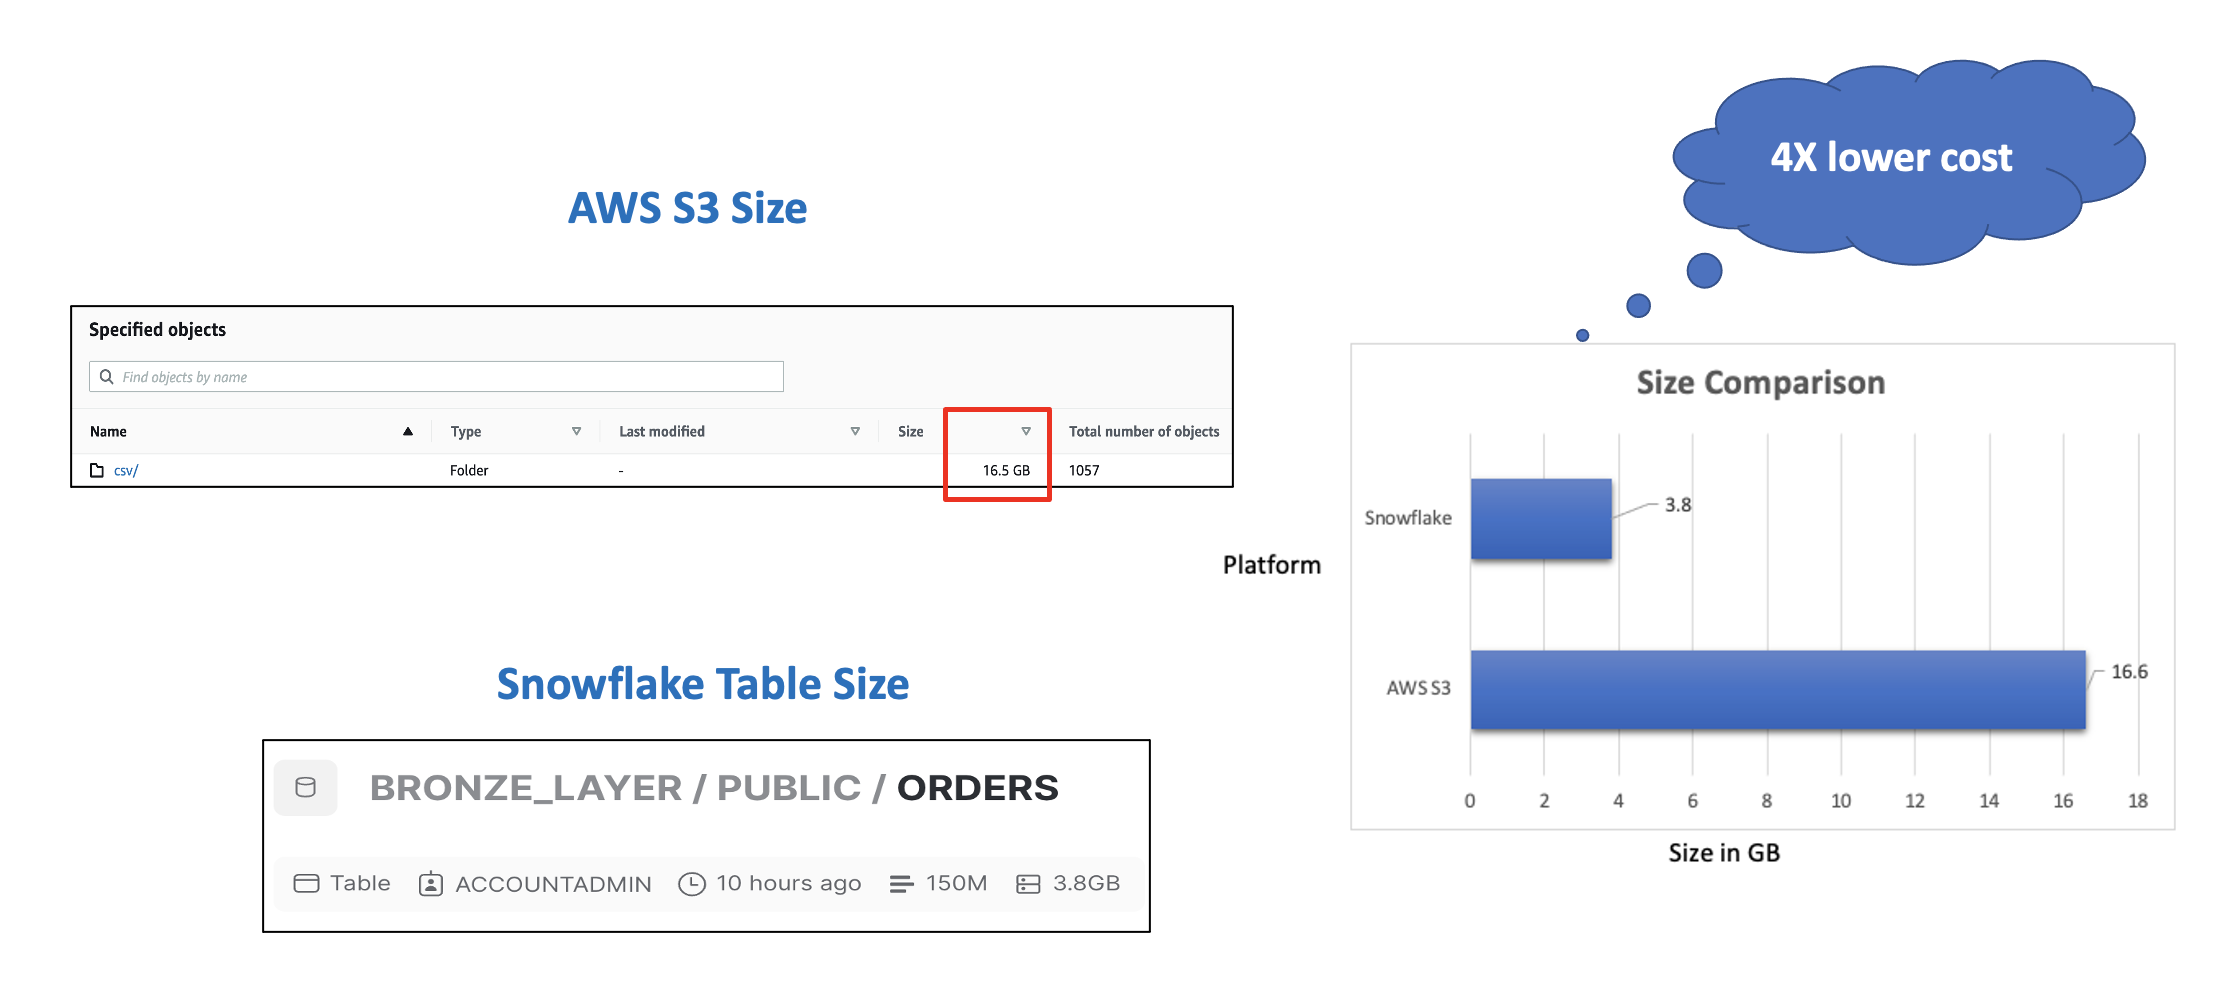

# Data Ingestion (Auto-loader)

#### Get file extension function

In [9]:
from snowflake.snowpark.types import StringType
session.add_packages('snowflake-snowpark-python')
ext_file_extension = session.udf.register_from_file(name="file_extension_extract", is_permanent=True, stage_location="@udf", replace=True,
    file_path="./file_extension_extract.py",
    func_name="file_extension_extract",
    return_type=StringType(),input_types=[StringType()]
) 

### Snowpark Autoloader 

Snowpark offers developers lot of flexibility. Instead of creating lot of snowflake objects, they can load the data directly into snowflake tables accelerating their development. 

Without Snowpark the current way to copy CSV file to Snowflake table is as follows.

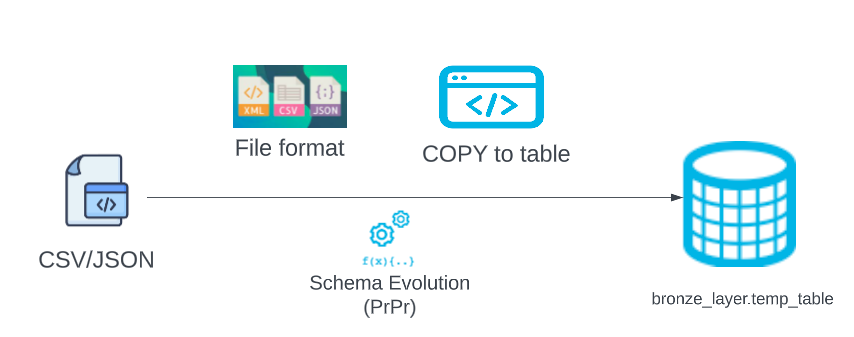

With Snowpark, it is much easy to do this. Also you can also customize the data load like filtering, Masking, tokenizing etc during the load (if needed)

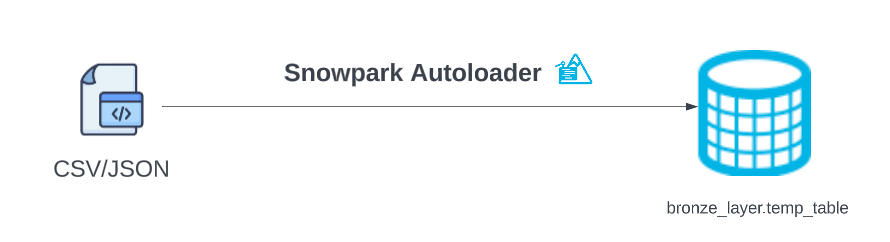

In [64]:
%%time
import snowflake.snowpark
from snowflake.snowpark.functions import sproc
import pandas as pd

@sproc(name="autoloader", is_permanent=True, stage_location="@udf", replace=True, packages=["snowflake-snowpark-python", "pandas"])
def autoloader(session: snowflake.snowpark.Session, file_path: str, file_type: str, table_name: str) -> str:
    import pandas as pd
    import _snowflake 
    import io
    file = io.BytesIO(_snowflake.open(file_path, is_owner_file=True).read())
    if file_type == "csv":
        df= pd.read_csv(file, quotechar="\"")
    elif file_type == "json":
        df= pd.read_json(file, lines=True)
    elif file_type == "excel":
        df= pd.read_excel(file)
    elif file_type == "orc":
        df= pd.read_orc(file)
    elif file_type == "parquet":
        df= pd.read_parquet(file)
    else:
        return "Invalid file type"
    session.write_pandas(df, table_name, auto_create_table=True, overwrite=True)
    return "Table loaded successfully"

CPU times: user 23.4 ms, sys: 4.32 ms, total: 27.7 ms
Wall time: 9.07 s


#### CSV Loading demo

##### Unloading from Snowflake

In [17]:
session.sql("create or replace file format my_csv_unload_format type = csv field_optionally_enclosed_by='\"' COMPRESSION = NONE;").collect()
session.sql("CREATE OR REPLACE STAGE my_s3_csv_stage  storage_integration = BRONZE_INTEGRATION url = 's3://naveen-demo-s3-bucket/marketing/csv/' file_format = my_csv_unload_format ;").collect()

[Row(status='Stage area MY_S3_CSV_STAGE successfully created.')]

In [27]:
session.sql("copy into @my_s3_csv_stage from SNOWFLAKE_SAMPLE_DATA.TPCH_SF100.SUPPLIER HEADER = TRUE;").collect()

[Row(rows_unloaded=1000000, input_bytes=149870937, output_bytes=149870937)]

In [56]:
session.sql("create or replace file format my_json_unload_format type = json REPLACE_INVALID_CHARACTERS=True COMPRESSION = NONE;").collect()
session.sql("CREATE OR REPLACE STAGE my_s3_json_stage  storage_integration = BRONZE_INTEGRATION url = 's3://naveen-demo-s3-bucket/marketing/json/' file_format = my_json_unload_format ;").collect()

In [57]:
session.sql("copy into @my_s3_json_stage from (SELECT OBJECT_CONSTRUCT(*) FROM SNOWFLAKE_SAMPLE_DATA.TPCH_SF100.SUPPLIER)").collect()

[Row(rows_unloaded=1000000, input_bytes=232750337, output_bytes=232750337)]

#### Loading CSV and JSON data into Snowflake table

In [ ]:
session.sql("call autoloader('@my_s3_csv_stage/data_0_0_0.csv', 'csv', 'temp_csv_load')").collect()

In [65]:
session.sql("call autoloader('@my_s3_json_stage/data_0_0_0.json', 'json', 'temp_json_load')").collect()

[Row(AUTOLOADER='Table loaded successfully')]

In [68]:
session.sql('select * from "temp_csv_load" limit 10;').to_pandas()

,S_SUPPKEY,S_NAME,S_ADDRESS,S_NATIONKEY,S_PHONE,S_ACCTBAL,S_COMMENT
0,339967,Supplier#000339967,IxVdHy4B4V LKEcBkTXB,16,26-963-921-3935,5224.73,structions haggle furiously. carefully final d...
1,339968,Supplier#000339968,"GY 2ft,WTIyOji3SA",4,14-110-867-1135,8104.65,foxes cajole blithely alongside of the pinto b...
2,339969,Supplier#000339969,VXb7sJpBjzb,15,25-868-993-8128,-119.84,"telets. quickly fluffy ideas unwind. regular, ..."
3,339970,Supplier#000339970,XfIjaqCNfYdnaQYbfhP,13,23-542-274-3613,7786.54,", unusual deposits. carefully iron"
4,339971,Supplier#000339971,"QcWhCiXyhkh13Kb9H,1LrbuXrvl8pAk9",1,11-748-239-2312,-582.57,"nts. special, final pinto beans cajole. packag"
5,339972,Supplier#000339972,zZjIuKhbpdxyqweAys,18,28-548-936-9373,7625.32,bout the bold deposits. carefully final reques...
6,339973,Supplier#000339973,"le8LSAoD,,fpc6vEJQwjJQEY",4,14-690-520-5742,6776.46,furiously express requests. blithely special a...
7,339974,Supplier#000339974,P0uUNxU ThdCTxw43Xpyrf5D9VbjTXE,14,24-322-521-7437,6958.61,y slyly special deposits. furiously unusual pa...
8,339975,Supplier#000339975,K0Ojr4D2UGc9BwgU,18,28-692-582-4742,-577.97,ld packages try to nag during the final accoun...
9,339976,Supplier#000339976,kjiNM2cd cISg3TPRh3xdig6 onpuBhG8nTpFnC3,7,17-442-626-8609,7970.35,ideas cajole. quickly final waters detect. fu...


In [67]:
session.sql('select * from "temp_json_load" limit 10;').to_pandas()

,S_ACCTBAL,S_ADDRESS,S_COMMENT,S_NAME,S_NATIONKEY,S_PHONE,S_SUPPKEY
0,6400.54,xiuzIZJdCZElC7HVlxG3jOW,"ithely express requests haggle unusual, unusua...",Supplier#000336634,1,11-178-876-1329,336634
1,2936.82,JuxWr2T8lHTHMdzMCXRR7yJEnw9ZVexaImwU,ns are fluffily. permanent asymptotes need to ...,Supplier#000336635,11,21-867-733-8776,336635
2,101.70,zkEkrN fKadp2zXzqB9l8227c8lTBa2SK,s. final accounts about the blithely bold acco...,Supplier#000336636,16,26-918-790-8059,336636
3,2228.47,SGVPtqNivOcLNZu,thely. slowly special ideas sl,Supplier#000336637,22,32-173-366-6900,336637
4,7801.74,"X6R1matkDZ,BNjet4qf",y special foxes. blithely regular dependencies...,Supplier#000336638,16,26-227-338-7931,336638
5,1890.20,1zWl4exB8rVnsWK,c pearls. deposits haggle,Supplier#000336639,9,19-339-735-6777,336639
6,9556.27,C8mzaP8G987tlv QweWw,ages haggle final ideas. blithely ironic r,Supplier#000336640,21,31-832-234-9034,336640
7,-623.83,"NgGgIJg1hR4cdyKFcqQ,hEMNy9L8b4LgoC8DWkk",fluffily express theodolites about the slyly ...,Supplier#000336641,19,29-454-673-8025,336641
8,7160.83,"Yo,NR0AK 8,IpaEzcVCFbcNzmH7phfRfLrwaIfr","long the even, ironic packages wake above the ...",Supplier#000336642,11,21-965-908-4165,336642
9,-868.11,mFULh otR05hputeMiYos3Vb8 WqVJA4dR,y bold deposits wake slyly dependencies! somet...,Supplier#000336643,1,11-230-717-9331,336643


# <font size="5"><ins>Unstructured File Processing</ins></font>

The scenario we will cover for Unstructured Processing is as below.

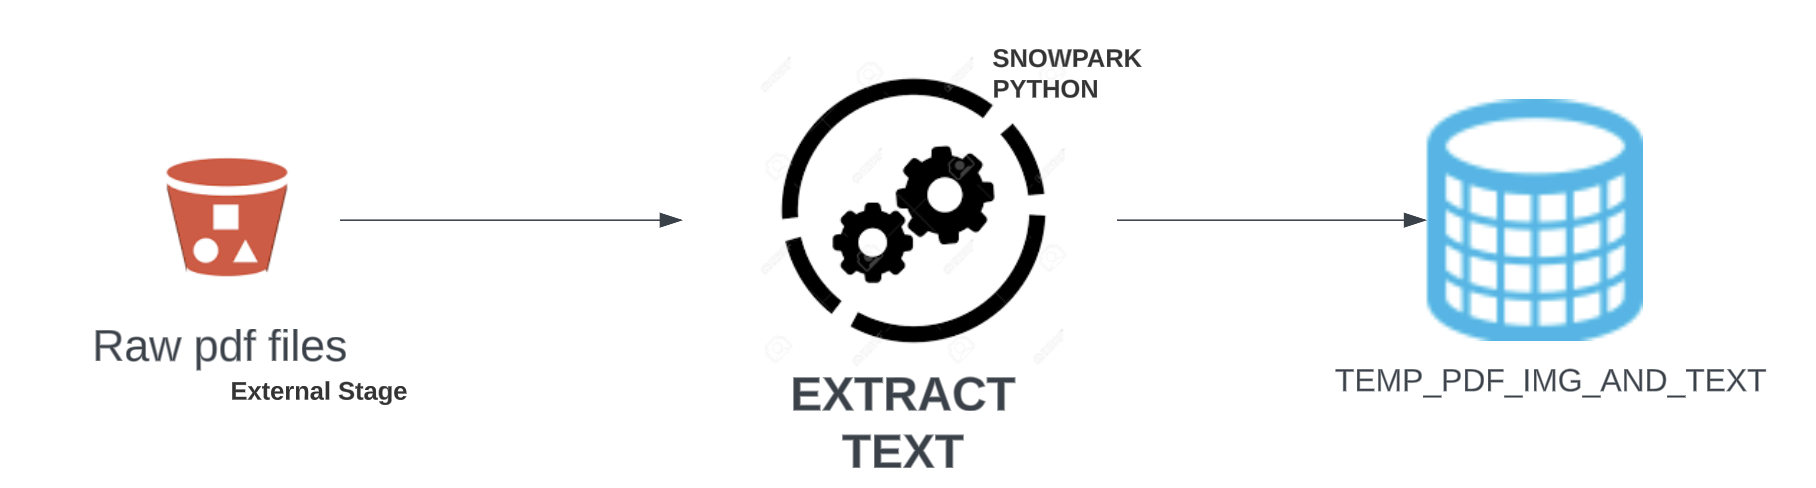

In [27]:
session.sql("CREATE OR REPLACE DATABASE PDF_EXTRACT_EY_DEMO;").collect()

[Row(status='Database PDF_EXTRACT_EY_DEMO successfully created.')]

In [4]:
session.sql("LIST @pdf_ext_s3_stage;").collect()

[Row(name='s3://naveen-demo-s3-bucket/sales/pdfextract/File_20221124-095935.pdf', size=2224068, md5='bbef94bd5999535ddeaf7b319310eee7', last_modified='Mon, 20 Feb 2023 18:45:15 GMT'),
 Row(name='s3://naveen-demo-s3-bucket/sales/pdfextract/Payslip_59985333.pdf', size=14802, md5='00e114fd2faa7b17c2272d04667519fa', last_modified='Mon, 20 Feb 2023 18:45:15 GMT'),
 Row(name='s3://naveen-demo-s3-bucket/sales/pdfextract/Payslip_61617483.pdf', size=15863, md5='c1ae2a343d02ead5c67844697209f79d', last_modified='Mon, 20 Feb 2023 18:45:15 GMT'),
 Row(name='s3://naveen-demo-s3-bucket/sales/pdfextract/invoice.pdf', size=52088, md5='1f190f1c1871fd54876f8474ff6034a2', last_modified='Mon, 20 Feb 2023 18:45:15 GMT')]

In [34]:
from snowflake.snowpark.types import StringType
session.add_packages('snowflake-snowpark-python', 'pypdf2')
pdfext_udf = session.udf.register_from_file(name="pdfextract", is_permanent=True, stage_location="@udf", replace=True,
    file_path="./pdf_extract.py",
    func_name="pdfextract",
    return_type=StringType(),input_types=[StringType()]
) 

The version of package pypdf2 in the local environment is 3.0.1, which does not fit the criteria for the requirement pypdf2. Your UDF might not work when the package version is different between the server and your local environment


In [37]:
session.sql("select pdfextract('@pdf_ext_s3_stage/invoice.pdf'); ").to_pandas()

,PDFEXTRACT('@PDF_EXT_S3_STAGE/INVOICE.PDF')
0,Invoice num.: 564003\nProvider\nABC LTD\nCusto...


In [42]:
session.sql("CREATE OR REPLACE TABLE TEMP_PDF_IMG_AND_TEXT (SCOPED_URL VARCHAR, PDF_TEXT VARCHAR)").collect()

[Row(status='Table TEMP_PDF_IMG_AND_TEXT successfully created.')]

In [43]:
session.sql("INSERT INTO TEMP_PDF_IMG_AND_TEXT SELECT BUILD_SCOPED_FILE_URL(@pdf_ext_s3_stage,'invoice.pdf') as SCOPED_URL, \
            pdfextract('@pdf_ext_s3_stage/invoice.pdf') as pdf_text").collect()
            

[Row(number of rows inserted=1)]

In [3]:
session.sql("SELECT * FROM TEMP_PDF_IMG_AND_TEXT").to_pandas()

,SCOPED_URL,PDF_TEXT
0,https://ana95816.snowflakecomputing.com/api/fi...,Invoice num.: 564003\nProvider\nABC LTD\nCusto...


# <font size="5"><ins>Semi Structured - Serverless Data Loading + Data Quality Check using Rule Catalog</ins></font>

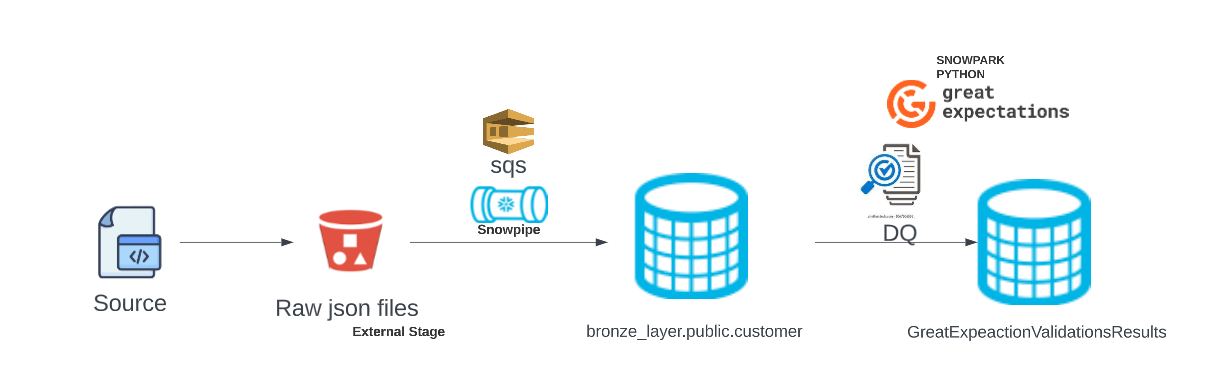

In [6]:
session.sql("use database bronze_layer;").collect()

session.sql("CREATE OR REPLACE FILE FORMAT FILE_FORMAT_JSON_GENERIC \
 TYPE = 'JSON' \
 ENABLE_OCTAL = FALSE \
 ALLOW_DUPLICATE  = TRUE \
 STRIP_OUTER_ARRAY = TRUE \
 STRIP_NULL_VALUES = TRUE \
 IGNORE_UTF8_ERRORS = FALSE;").collect()

session.sql("CREATE OR REPLACE STAGE my_ext_unload_stage URL='s3://naveen-demo-s3-bucket/sales/json/'   \
    STORAGE_INTEGRATION = BRONZE_INTEGRATION   \
    FILE_FORMAT = FILE_FORMAT_JSON_GENERIC;").collect()


[Row(status='Stage area MY_EXT_UNLOAD_STAGE successfully created.')]

In [12]:
session.sql("COPY INTO @my_ext_unload_stage FROM (select ARRAY_AGG(object_construct(*)) from temp_customer) OVERWRITE = TRUE;").collect()

[Row(rows_unloaded=1, input_bytes=2712, output_bytes=1059)]

In [9]:
session.sql("create or replace pipe JSON_INGEST_PIPE auto_ingest=true as COPY INTO CUSTOMER FROM ( \
	SELECT $1:C_CUSTKEY::INTEGER, \
       $1:C_NAME::VARCHAR, \
       $1:C_ADDRESS::VARCHAR, \
       $1:C_NATIONKEY::INTEGER, \
       $1:C_PHONE::VARCHAR, \
       $1:C_ACCTBAL::VARCHAR, \
       $1:C_ACCTBAL::VARCHAR, \
       $1:C_ACCTBAL::VARCHAR \
	FROM @my_ext_unload_stage (FILE_FORMAT => FILE_FORMAT_JSON_GENERIC));").collect()

[Row(status='Pipe JSON_INGEST_PIPE successfully created.')]

In [10]:
session.sql("show pipes;").collect()

[Row(created_on=datetime.datetime(2023, 2, 21, 16, 42, 7, 817000, tzinfo=<DstTzInfo 'America/Los_Angeles' PST-1 day, 16:00:00 STD>), name='JSON_INGEST_PIPE', database_name='BRONZE_LAYER', schema_name='PUBLIC', definition='COPY INTO CUSTOMER FROM ( \tSELECT $1:C_CUSTKEY::INTEGER,        $1:C_NAME::VARCHAR,        $1:C_ADDRESS::VARCHAR,        $1:C_NATIONKEY::INTEGER,        $1:C_PHONE::VARCHAR,        $1:C_ACCTBAL::VARCHAR,        $1:C_ACCTBAL::VARCHAR,        $1:C_ACCTBAL::VARCHAR \tFROM @my_ext_unload_stage (FILE_FORMAT => FILE_FORMAT_JSON_GENERIC))', owner='ACCOUNTADMIN', notification_channel='arn:aws:sqs:eu-west-2:040558436780:sf-snowpipe-AIDAQS4LYUGWCZUMNVOQT-VRkV-i_vk_MYJS1HWcgMjA', comment='', integration=None, pattern=None, error_integration=None)]

In [11]:
session.sql("SELECT SYSTEM$PIPE_STATUS('BRONZE_LAYER.public.JSON_INGEST_PIPE');").collect()

[Row(SYSTEM$PIPE_STATUS('BRONZE_LAYER.PUBLIC.JSON_INGEST_PIPE')='{"executionState":"RUNNING","pendingFileCount":0,"notificationChannelName":"arn:aws:sqs:eu-west-2:040558436780:sf-snowpipe-AIDAQS4LYUGWCZUMNVOQT-VRkV-i_vk_MYJS1HWcgMjA","numOutstandingMessagesOnChannel":1,"lastReceivedMessageTimestamp":"2023-02-22T00:42:03.077Z","lastPulledFromChannelTimestamp":"2023-02-22T00:42:22.923Z"}')]

In [14]:
session.sql("select *  \
  from table(information_schema.pipe_usage_history(  \
    date_range_start=>dateadd('day',-1,current_date()),  \
    date_range_end=>current_date(),  \
    pipe_name=>'BRONZE_LAYER.public.JSON_INGEST_PIPE'));").collect()

[]

### Initialize

- Here we are downloading the GE 15.14 version from the Pypi to theb local folder on the machine where this code is running.
- This has been tested with GE 15.14. There was some issue with 15.17 where its trying to look for the package ipywidgets which is found in Snowflake anaconda channel but not found in information_schema.packages 


In [17]:
import os
import sys
import json
import platform
import os,requests
from pathlib import Path
import glob

# Current working directory is the Project Home DIR.
PROJECT_HOME_DIR = '.'
LOCAL_TEMP_DIR = os.path.join(PROJECT_HOME_DIR, 'temp') 
LOCAL_LIB_DIR = os.path.join(LOCAL_TEMP_DIR, 'libs')
LOCAL_TARFile_DIR = os.path.join(LOCAL_TEMP_DIR, 'tarfiles')
LIB_URLS = [
    #'https://files.pythonhosted.org/packages/9f/57/1539d783553f3d67cea1b55d7fe494373c5c0c9af689d4c0e0c2d3197739/great_expectations-0.15.17-py3-none-any.whl'
    'https://files.pythonhosted.org/packages/8e/9d/cecb12289f7967b15facf550a0bbb9c1e910968c3a61b91fd8cdb80aeb3c/great_expectations-0.15.14.tar.gz'
    
]

for lib_url in LIB_URLS:
    # get the file name, from the url
    splits = lib_url.split('/')
    tot_splits = len(splits)
    target_file = splits[-1]
    
    local_lib_fl = f'{LOCAL_TARFile_DIR}/{target_file}'
    print(local_lib_fl)

    # Create a local directory for TAR and extracting tar..
    Path(LOCAL_TARFile_DIR).mkdir(parents=True, exist_ok=True)
    print(f'Create local dir: {LOCAL_TARFile_DIR}')

    Path(LOCAL_LIB_DIR).mkdir(parents=True, exist_ok=True)
    print(f'Create local dir: {LOCAL_LIB_DIR}')

    print(f'Downloading library from PyPI to {LOCAL_TARFile_DIR} ...')
    with open(local_lib_fl, "wb") as f:
        r = requests.get(lib_url)
        f.write(r.content)

        
# Extract GE tar file

import tarfile
file = tarfile.open(local_lib_fl)
print(f'Started Extracting GE tar file to {LOCAL_TARFile_DIR} ...')
file.extractall(f'{LOCAL_LIB_DIR}/ge')
file.close()
print(f'Done extracting GE tar file to {LOCAL_TARFile_DIR} ...')
                                    

./temp/tarfiles/great_expectations-0.15.14.tar.gz
Create local dir: ./temp/tarfiles
Create local dir: ./temp/libs
Started Extracting GE tar file to ./temp/tarfiles ...
Done extracting GE tar file to ./temp/tarfiles ...


In [18]:
# Getting the path for the great_expectation folder after the tar file is extracted. This path is used in the session.add_imports()

import glob
ge_import_path=''
for result in glob.iglob('./temp/libs/ge/great_expectations*'):
    ge_import_path=result+'/great_expectations'
print(ge_import_path)


./temp/libs/ge/great_expectations-0.15.14/great_expectations


### Creating Python Stored Procedure

In [19]:
        
from great_expectations.data_context.types.base import DataContextConfig, DatasourceConfig, S3StoreBackendDefaults
from config import snowflake_conn_prop_local as snowflake_udf_conn_prop
from great_expectations.core.batch import BatchRequest, RuntimeBatchRequest
from great_expectations.data_context import BaseDataContext
from snowflake.snowpark.types import IntegerType, StringType, StructField,VariantType,StructType,BooleanType
from great_expectations.checkpoint.types.checkpoint_result import CheckpointResult
from great_expectations.data_context import DataContext
from config import snowflake_conn_prop_local as snowflake_conn_prop
from great_expectations.data_context import BaseDataContext
from great_expectations.data_context.types.base import DataContextConfig, DatasourceConfig, FilesystemStoreBackendDefaults
from great_expectations.checkpoint import Checkpoint

import json
import os

session.clear_packages()
session.add_packages('pyparsing','pandas','pycryptodomex','boto3','tzlocal','tqdm','requests','ruamel.yaml','ipython','jsonpatch','mistune','jinja2','jsonschema','scipy','altair','Click','colorama','cryptography','snowflake-snowpark-python','sqlalchemy','chardet','asn1crypto')
session.clear_imports()
session.add_import(ge_import_path)
# session.add_import('jwt')

@sproc(session=session,name="usp_generateValidationResults", replace=True, return_type=StringType(), is_permanent=True, stage_location='@udf/ge_AllLibs')
def generateValidationResults(session: Session) -> str:
    
    from pathlib import Path
    import os ,sys ,json ,tarfile
    
    data_context_config = DataContextConfig(
    datasources={
        "dataframe_datasource": DatasourceConfig(
            class_name="PandasDatasource",
            batch_kwargs_generators={
                "subdir_reader": {
                    "class_name": "SubdirReaderBatchKwargsGenerator",
                    "base_directory": "/tmp/great_expectation/",
                }
            },
        )
    },
    store_backend_defaults=FilesystemStoreBackendDefaults(root_directory="/tmp/great_expectation"),
    )
    
    # Creating the GE context here
    context = BaseDataContext(project_config=data_context_config)
    
    # Providing the datasource details which here is the pandas DF. We define the actual DF in the batch request which is defined after creating the DS
    
    datasource_config = {
    "name": "pandas_dataframe_datasource",
    "class_name": "Datasource",
    "module_name": "great_expectations.datasource",
    "execution_engine": {
        "module_name": "great_expectations.execution_engine",
        "class_name": "PandasExecutionEngine",
    },
    "data_connectors": {
        "default_runtime_data_connector_name": {
            "class_name": "RuntimeDataConnector",
            "module_name": "great_expectations.datasource.data_connector",
            "batch_identifiers": ["default_identifier_name"],
        },
    },
            }
    con='done'

    # Adding the DS to the context
    context.add_datasource(**datasource_config)
    
    # Converting the Snowpark DF into Pandas DF.
    df=session.sql("select top 100 * from BRONZE_LAYER.public.customer").to_pandas()
    
    #Creating the batch request whivh will be used 
    batch_request = RuntimeBatchRequest(
                                datasource_name="pandas_dataframe_datasource",
                                data_connector_name="default_runtime_data_connector_name",
                                data_asset_name="PandasData",  # This can be anything that identifies this data_asset for you
                                runtime_parameters={"batch_data": df},  # df is your dataframe, you have created above.
                                batch_identifiers={"default_identifier_name": "default_identifier"},
                                )
    
    # Creating the expecation suite
    context.create_expectation_suite(
    expectation_suite_name="pandas_expectation_suite", overwrite_existing=True)
    
    # Creating the validator which takes the batch request and expectation suite name
    validator = context.get_validator(
        batch_request=batch_request, expectation_suite_name="pandas_expectation_suite"
    )
    
    #Creating the required expectation. You can also create custom expectations as well. You can add additional inbuilt expectations as per the requirement
    validator.expect_column_min_to_be_between("C_CUSTKEY",0, 12000)
    validator.expect_column_min_to_be_between("C_NATIONKEY",1,24)
    #validator.expect_column_values_number_of_decimal_places_to_equal("C_ACCTBAL",2)
    
    #Saving the expectation 
    validator.save_expectation_suite(discard_failed_expectations=False)
    
    # Creating the checkpoint without writing to the file system and running by passing the run time parameters

    my_checkpoint_name = "pandas_checkpoint"
    checkpoint_config = {
                "name": my_checkpoint_name,
                "config_version": 1.0,
                "class_name": "SimpleCheckpoint",
                "run_name_template": "%Y%m%d-%H%M%S-my-pandas_run-name-template",
            }
            
    context.add_checkpoint(**checkpoint_config)

    # run expectation_suite against Pandas dataframe
    res = context.run_checkpoint(
            checkpoint_name = my_checkpoint_name,
            validations=[
                {
                    "batch_request": batch_request,
                    "expectation_suite_name": "pandas_expectation_suite",
                }
            ],
        )
    
        
    # Defining the schema, creating the Snowpark DF and and writing the validation results to a table.
    schema = StructType([StructField("RunStatus", BooleanType()),StructField("RunId", VariantType()), StructField("RunValidation", VariantType())])

    df=session.create_dataframe([[res.success, json.loads(str(res.run_id)),json.loads(str(res.list_validation_results()))]], schema)

    df.write.mode('append').saveAsTable('GreatExpeactionValidationsResults')
    return 'SUCCESS'

    

package boto3 is not installed in the local environmentYour UDF might not work when the package is installed on the server but not on your local environment.
The version of package tzlocal in the local environment is 4.2, which does not fit the criteria for the requirement tzlocal. Your UDF might not work when the package version is different between the server and your local environment
The version of package ruamel.yaml in the local environment is 0.17.16, which does not fit the criteria for the requirement ruamel.yaml. Your UDF might not work when the package version is different between the server and your local environment
The version of package ipython in the local environment is 8.10.0, which does not fit the criteria for the requirement ipython. Your UDF might not work when the package version is different between the server and your local environment
The version of package mistune in the local environment is 2.0.5, which does not fit the criteria for the requirement mistune. Y

In [20]:
session.sql("call usp_generateValidationResults()").collect()

[Row(USP_GENERATEVALIDATIONRESULTS='SUCCESS')]

In [4]:
session.sql("with Validations as ( \
    SELECT RUNID:run_name::varchar as RunName,RUNID:run_time::TIMESTAMP as RunTime \
         ,validation.value:success as RunSuccessStatus \
         ,validation.value:meta:active_batch_definition:batch_identifiers:default_identifier_name::varchar as IdentifierName \
         ,res.value:expectation_config:expectation_type::varchar as ExpectationType \
         ,res.value:success as ExpectationRunStatus \
         ,res.value:expectation_config:kwargs:column::varchar as ColumnName \
         ,res.value:expectation_config:kwargs:value_set::variant as ValueSet \
         ,res.value:expectation_config:kwargs:max_value::variant as MaxValue \
         ,res.value:expectation_config:kwargs:min_value::variant as MinValue \
         ,res.value:result:observed_value::variant as ObservedValue \
         ,concat_ws(',',MinValue,Maxvalue) as RangeValueSet \
    FROM GreatExpeactionValidationsResults v,  \
    LATERAL FLATTEN(input => RUNVALIDATION) validation, \
    LATERAL FLATTEN(input => validation.value:results) res  \
) \
SELECT RunName \
,RunTime \
,RunSuccessStatus \
,IdentifierName \
,ExpectationType \
,ExpectationRunStatus \
,ColumnName \
,coalesce(ValueSet,RangeValueSet) As ValuesRange   \
,ObservedValue \
FROM Validations;").to_pandas()

,RUNNAME,RUNTIME,RUNSUCCESSSTATUS,IDENTIFIERNAME,EXPECTATIONTYPE,EXPECTATIONRUNSTATUS,COLUMNNAME,VALUESRANGE,OBSERVEDVALUE
0,20230221-155021-my-pandas_run-name-template,2023-02-21 15:50:21.476589,false,default_identifier,expect_column_min_to_be_between,false,C_NATIONKEY,"1,24",0
1,20230221-164511-my-pandas_run-name-template,2023-02-21 16:45:11.903179,false,default_identifier,expect_column_min_to_be_between,false,C_CUSTKEY,"0,12000",11100001
2,20230221-164511-my-pandas_run-name-template,2023-02-21 16:45:11.903179,false,default_identifier,expect_column_min_to_be_between,false,C_NATIONKEY,"1,24",0


# <font size="5"><ins>Snowpark - Transformations</ins></font>

### To understand how its done, I have taken a simple example of removing duplicates from a 6M sample table

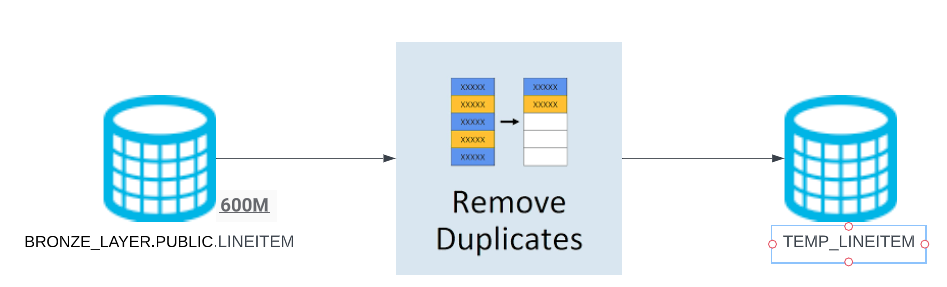


In [11]:
session.sql("ALTER WAREHOUSE DEMO_QAS_WH SET WAREHOUSE_SIZE = 'X-LARGE';").collect() #-- For re-runs
session.sql("CREATE OR REPLACE STAGE UDF;").collect()

[Row(status='Stage area UDF successfully created.')]

In [2]:
%%time
import snowflake.snowpark
from snowflake.snowpark.functions import sproc

@sproc(name="write_distinct_df_to_table", is_permanent=True, stage_location="@udf", replace=True, packages=["snowflake-snowpark-python"])
def write_distinct_df_to_table(session: snowflake.snowpark.Session, table_name: str) -> str:
    lineitem_df = session.table('LINEITEM')
    lineitem_df = lineitem_df.dropDuplicates()
    lineitem_df.write.mode("overwrite").save_as_table(table_name)
    return 'Table Created Sucessfully'
    
session.sql("call write_distinct_df_to_table('temp_lineitem')").collect()

CPU times: user 289 ms, sys: 16 ms, total: 305 ms
Wall time: 32min 45s


[Row(WRITE_DISTINCT_DF_TO_TABLE='Table Created Sucessfully')]

### SQL Generated behind the scenes in Snowflake for the UDF created using Snowpark dataframes

1. PROC created as pickle (binary file on disk)
2. When the PROC is called, the dedup is done using a SQL (as simple as that)

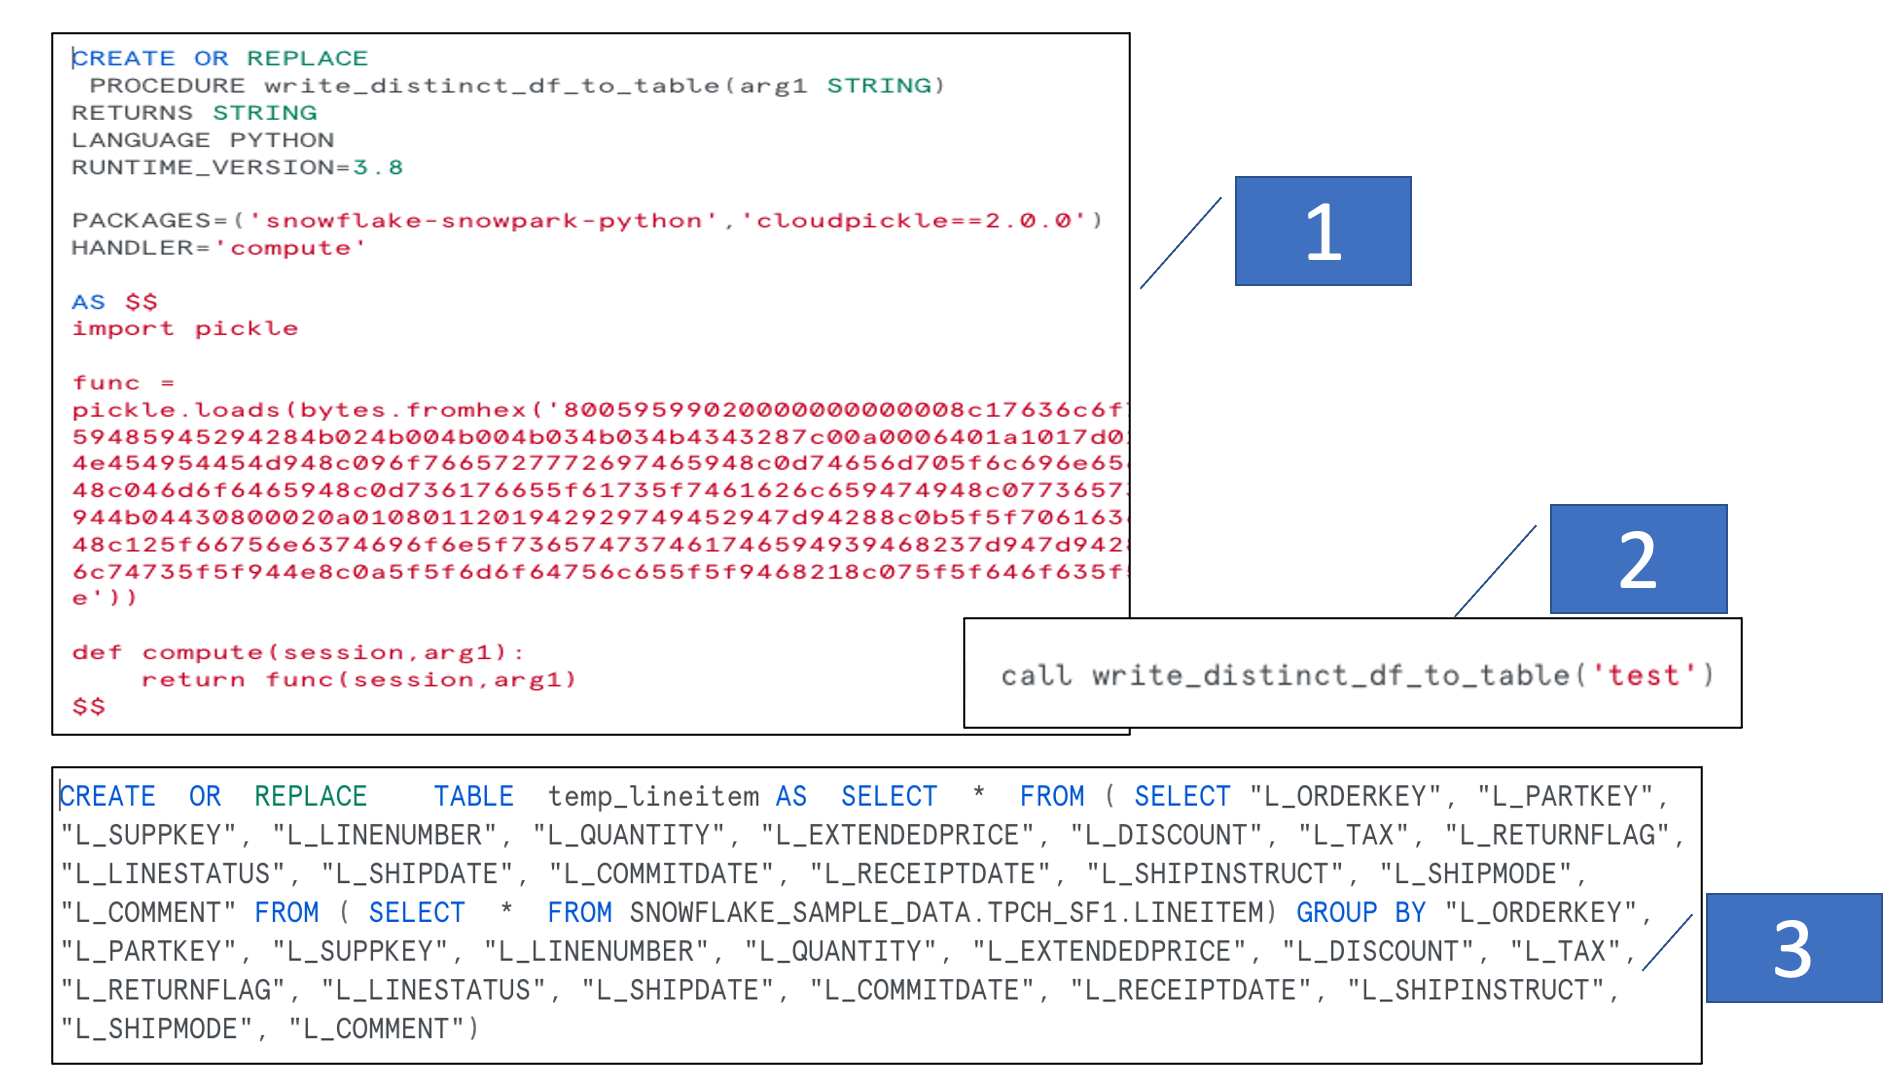

<hr/>
<hr/>
<h1><ins> Further more example of Transformation </ins> </h1>
<hr/>
<hr/>

<font size="4">The below example covers how a common apply transformation of Pandas API can be implemented within Snowpark.</font>

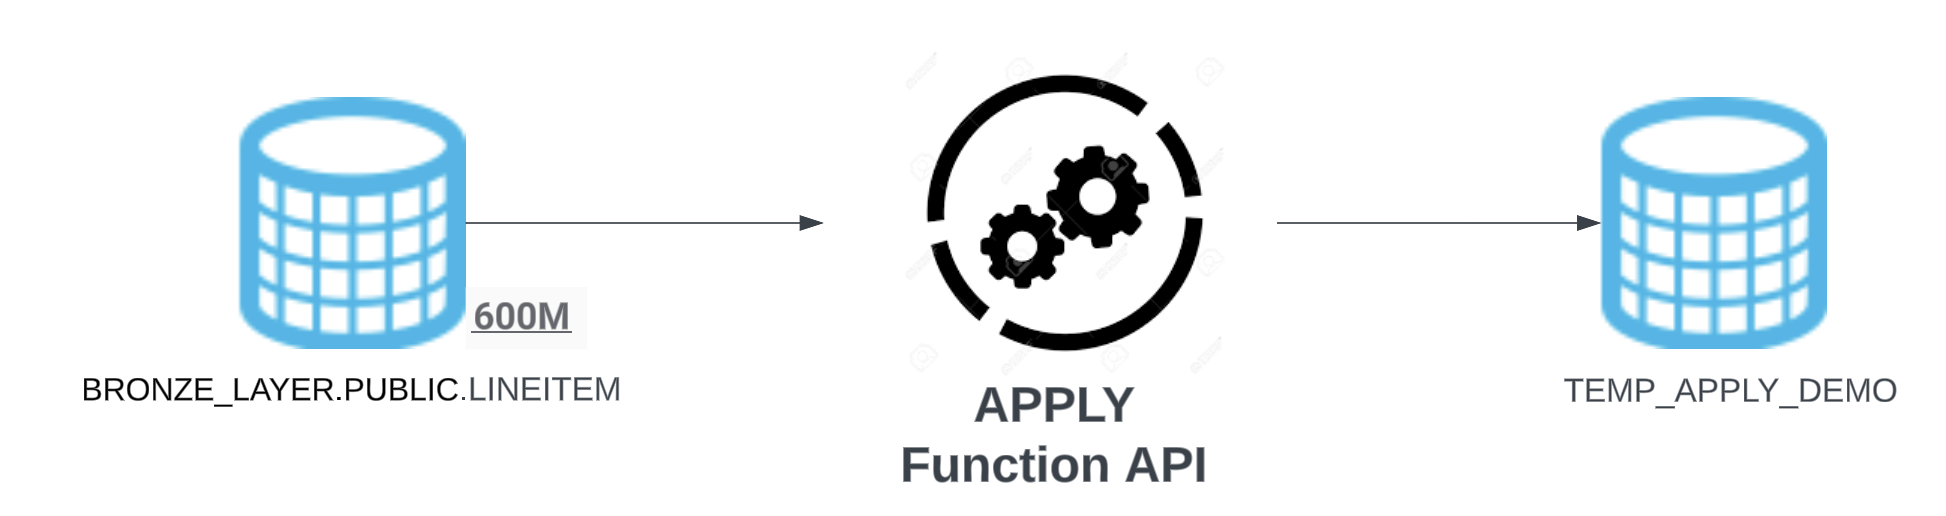

In [38]:
%%time
import snowflake.snowpark
from snowflake.snowpark.functions import sproc
from snowflake.snowpark.functions import udf
from snowflake.snowpark.types import StringType

update_lineitem = udf(lambda x: 'DELIVER IN PERSON' if x=='NONE' else x, return_type=StringType(), input_types=[StringType()], 
                      name="update_lineitem", replace=True)

@sproc(name="apply_demo_df_to_table", is_permanent=True, stage_location="@udf", replace=True, packages=["snowflake-snowpark-python"])
def apply_demo_df_to_table(session: snowflake.snowpark.Session, x: str) -> str:
    lineitem_df = session.table('LINEITEM')
    lineitem_df = lineitem_df.with_column('L_SHIPINSTRUCT_UPDATED', update_lineitem(lineitem_df['L_SHIPINSTRUCT']))
    lineitem_df.write.mode("overwrite").save_as_table("temp_apply_demo_snowpark")
    return 'Table Updated Sucessfully'
    
session.sql("call apply_demo_df_to_table('test')").collect()

CPU times: user 211 ms, sys: 53.8 ms, total: 265 ms
Wall time: 1min 33s


[Row(APPLY_DEMO_DF_TO_TABLE='Table Updated Sucessfully')]

# <font size="6">Summary</font>

<font size="4">As you can see Snowflake can store and process all types of data (Structured, Unstructured and Semi-structured) data at a record time. Snowflake is a pure serverless offering, where you Pay As You Use. It also scales independently and you can have any number of clusters for your account which is ideal for your different domains giving them ultimate freedom to own their data products. With Snowpark providing freedom for DE and DS to use Python code within Snowflake opens up a wider range of use-cases and possibilities. Snowflake Sharing capability which will follow this lab is a unique feature of Snowflake where every Customer in Snowflake can share data with each other with Market golden standard governance and security. This enables Data Mesh, Data Fabric based architecure possible within Snowflake DataCloud. With lot of cool features being developed like Native Applications, Unistore, Streamlit integration and with its wider parter eco-system <ins>SNOWFLAKE BECOMES THE ONE AND ONLY PLATFORM FOR THE ENTERPRISES WITH LONG-TERM VISION </ins></font>

In [81]:
if session: # it is good to ensure there is NO ACTIVE SESSION when using Snowpark in notebook hence closing down any session for code reusablity
    session.close()